## Housing Company Assignment

The solution is divided into the following sections: 
- Importing Liberaries
- Data Upload
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
     - Feature Selection using Linear Regression with RFE and StatsModel
     - Building model using statsmodel, for the detailed statistics
     - Linear Regression with selected features
     - Ridge Regression
     - Lasso
     - Changes in the coefficients after regularization
- Assignment Questions


### 1. Importing Liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


### 2. Data Upload

In [2]:
# reading the dataset
data = pd.read_csv("train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3. Data Understanding and Exploration

#### Basic Understanding

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Total of 1460 entries
# Combination of numeric and non numeric columns
# Many columns have null values

In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# 'ID' not usefull for model
# CLuster of 
#     Garage related fields
#     Fireplace related fields
#     Basement related fields
#     Floors related fields
#     Kitchen related fields
#     Pool related fields
#     Porch related fields
#     Neighborhood and Locality related fields
#     Heating related fields
#     Previous transaction related fields
#     Lot and Land Properties
    

In [8]:
numeric_data = data.select_dtypes(include=["number"])
nonnumeric_data = data.select_dtypes(exclude=["number"])

### 4. Data Cleaning

#### Handling Blank Values

In [9]:
# Drop column 'ID'
data.drop('Id', axis = 1, inplace = True)

###### LotFrontage

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

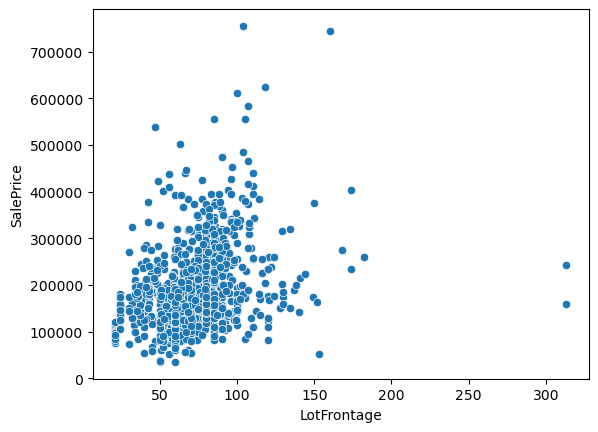

In [10]:
sns.scatterplot(data=data, x='LotFrontage', y='SalePrice')

In [11]:
# LotFrontage is the feet of road connectted to property
# LotFrontage seems to have some correlation with the prperty value as shown in above scatterplots
# Only 1201 rows have the value
# cannot delete records where LotFrontage is empty as aroung 17-18% of records will be deleted.
# imputing mean value based on Neighborhood on blank value rows
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

###### Masonry veneer

In [12]:
data.MasVnrType.value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [13]:
# Masonry veneer
# Type is not filled for majority of rows.
# Dropping column MasVnrType
data = data.drop('MasVnrType', axis=1)
# MasVnrArea is filled for majority of rows
# As it has corelation with price, will keep it but fill value as 0 where not filled.
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

###### Alley

In [14]:
# Alley
data.Alley.value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [15]:
# Filling NA where not filled
data['Alley'] = data['Alley'].fillna('NA')

###### Basement

In [16]:
# Basement
data.BsmtQual.value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [17]:
data['BsmtQual'] = data['BsmtQual'].fillna('NA')
data['BsmtCond'] = data['BsmtCond'].fillna('NA')
data['BsmtExposure'] = data['BsmtExposure'].fillna('NA')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('NA')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('NA')

In [18]:
# Making sure that for properties where there is no basement, basement area is also 0
print(data[data["BsmtQual"] == 'NA'][['BsmtQual','BsmtFinSF1','BsmtFinSF2']])

     BsmtQual  BsmtFinSF1  BsmtFinSF2
17         NA           0           0
39         NA           0           0
90         NA           0           0
102        NA           0           0
156        NA           0           0
182        NA           0           0
259        NA           0           0
342        NA           0           0
362        NA           0           0
371        NA           0           0
392        NA           0           0
520        NA           0           0
532        NA           0           0
533        NA           0           0
553        NA           0           0
646        NA           0           0
705        NA           0           0
736        NA           0           0
749        NA           0           0
778        NA           0           0
868        NA           0           0
894        NA           0           0
897        NA           0           0
984        NA           0           0
1000       NA           0           0
1011       N

###### Fireplace

In [19]:
# Fireplace
data['FireplaceQu'] = data['FireplaceQu'].fillna('NA')

###### Garage

In [20]:
# Garage
data[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageType    1379 non-null   object 
 1   GarageYrBlt   1379 non-null   float64
 2   GarageFinish  1379 non-null   object 
 3   GarageCars    1460 non-null   int64  
 4   GarageArea    1460 non-null   int64  
 5   GarageQual    1379 non-null   object 
 6   GarageCond    1379 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 80.0+ KB


In [21]:
data['GarageType'] = data['GarageType'].fillna('NA')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna('1900')
data['GarageFinish'] = data['GarageFinish'].fillna('NA')
data['GarageQual'] = data['GarageQual'].fillna('NA')
data['GarageCond'] = data['GarageCond'].fillna('NA')
data[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageType    1460 non-null   object
 1   GarageYrBlt   1460 non-null   object
 2   GarageFinish  1460 non-null   object
 3   GarageCars    1460 non-null   int64 
 4   GarageArea    1460 non-null   int64 
 5   GarageQual    1460 non-null   object
 6   GarageCond    1460 non-null   object
dtypes: int64(2), object(5)
memory usage: 80.0+ KB


###### Others

In [22]:
data['PoolQC'] = data['PoolQC'].fillna('NA')
data['Fence'] = data['Fence'].fillna('NA')
data['MiscFeature'] = data['MiscFeature'].fillna('NA')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Deleting Corelated fields

<Axes: >

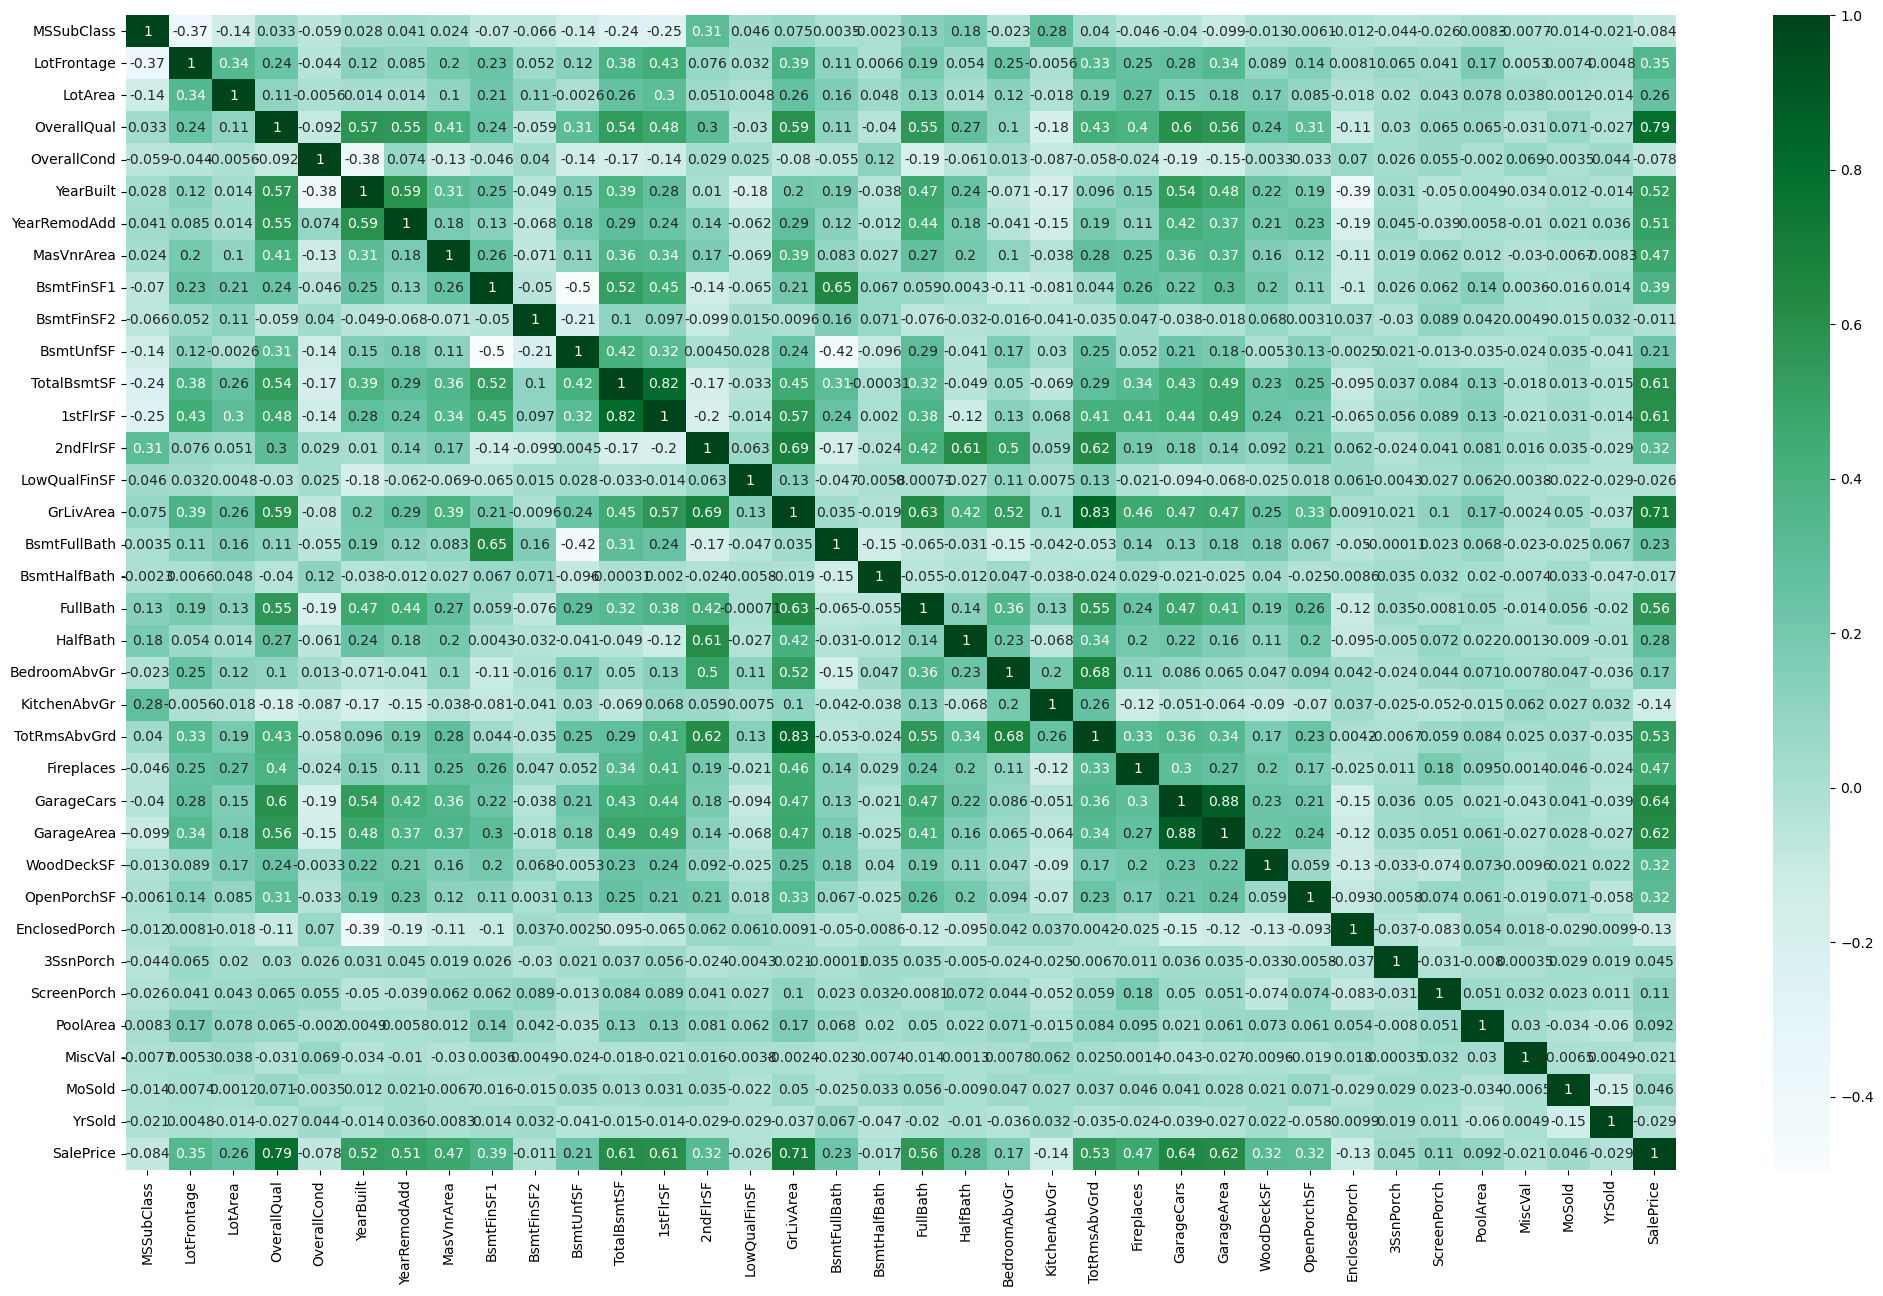

In [24]:
plt.figure(figsize=(25,15))
sns.color_palette("Greens")
sns.heatmap(data.select_dtypes(exclude = ['object']).corr(), cmap='BuGn', annot = True)

In [25]:
# GarageCars is highly correlated with GarageArea - Will remove GarageCars
# GarageYrBlt is highly correlated with YearBuilt - Will remove GarageYrBlt
# 1stFlrSF is highly correlated with TotalBsmtSF - Will remove TotalBsmtSF
# GrLivingArea is highly correlated with TotRmsAbvGrd - Will remove TotRmsAbvGrd
col_tobe_removed = ['GarageCars','GarageYrBlt','TotalBsmtSF','TotRmsAbvGrd']
data.drop(col_tobe_removed, axis = 1, inplace = True)

<Axes: >

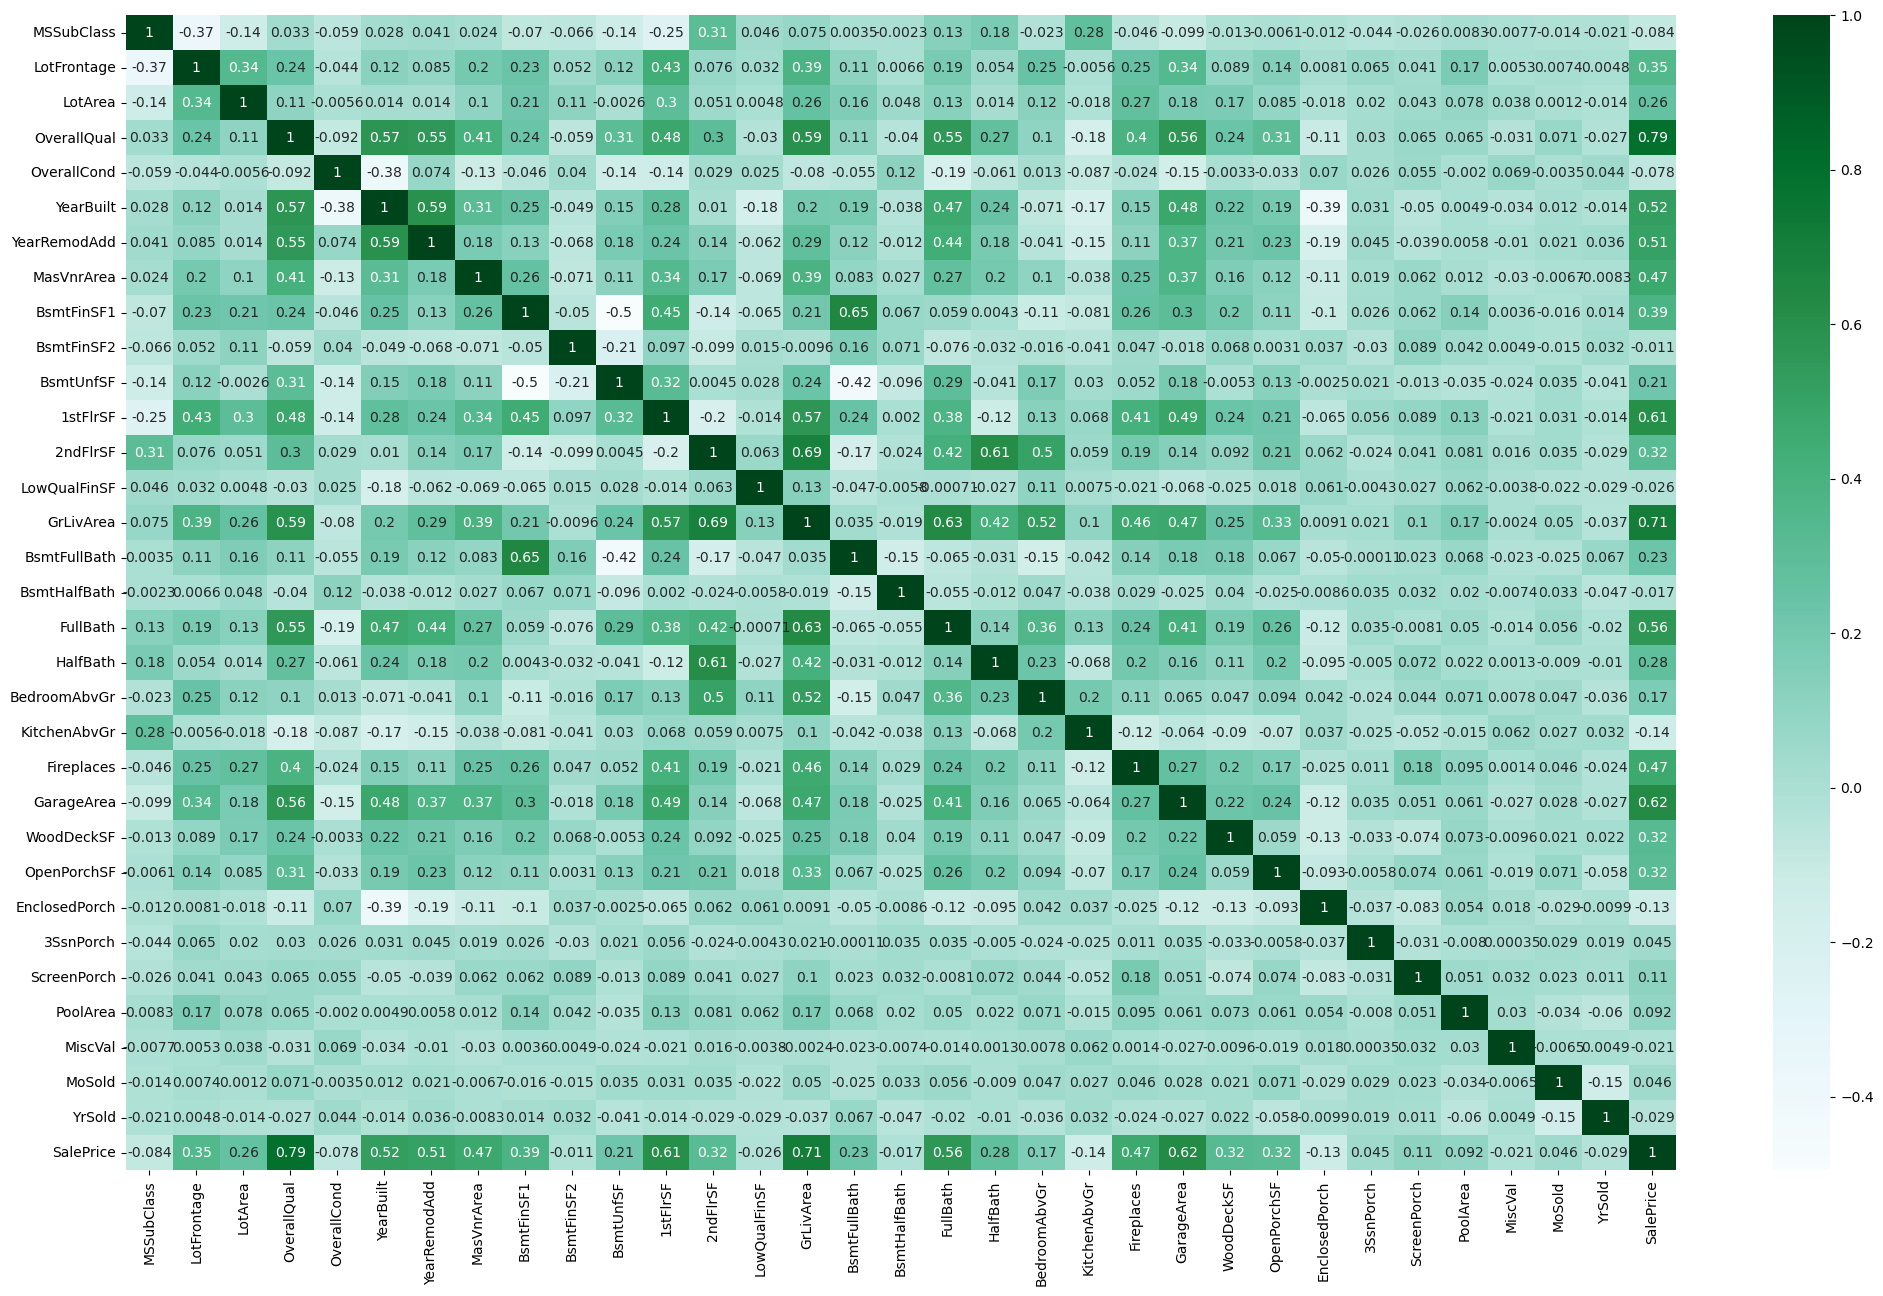

In [26]:
plt.figure(figsize=(25,15))
sns.color_palette("Greens")
sns.heatmap(data.select_dtypes(exclude = ['object']).corr(), cmap='BuGn', annot = True)

#### Handling Outliers

In [27]:
# outliers
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [28]:
# Above data shows that there are outliers in the data, plotting boxplots to visualize the same

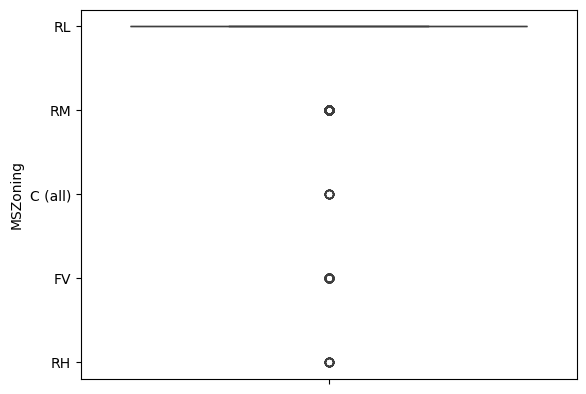

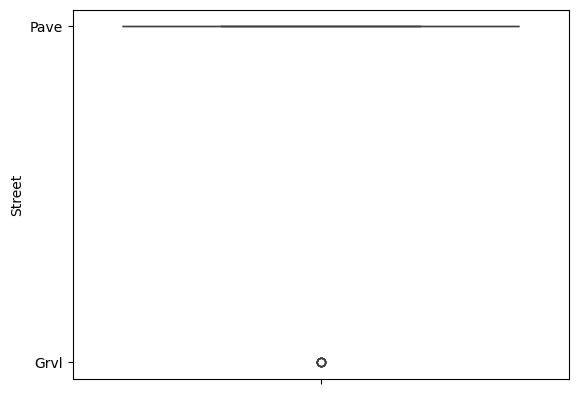

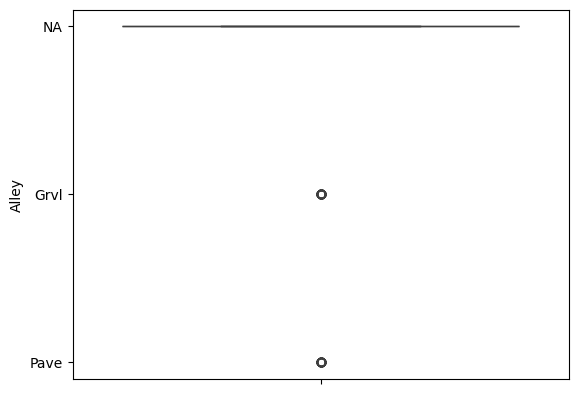

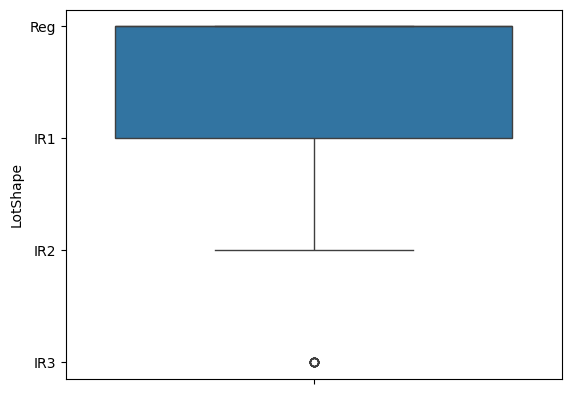

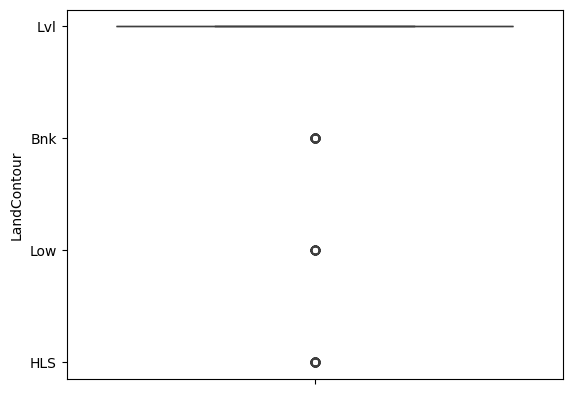

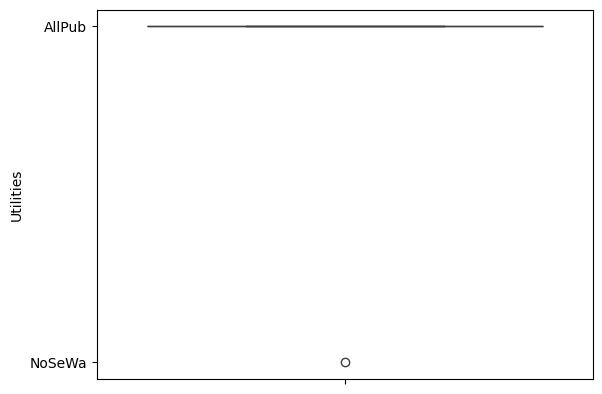

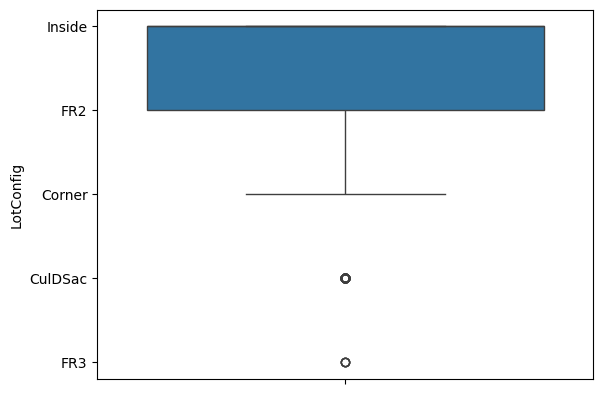

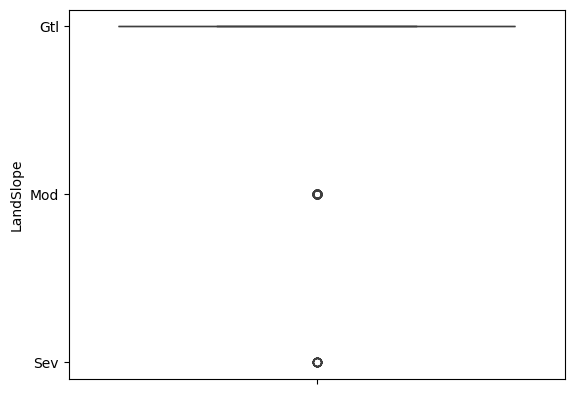

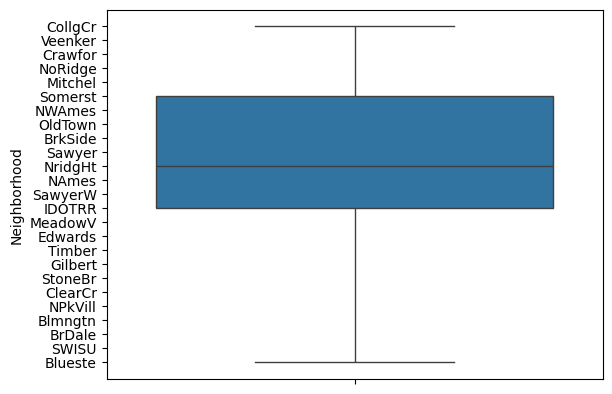

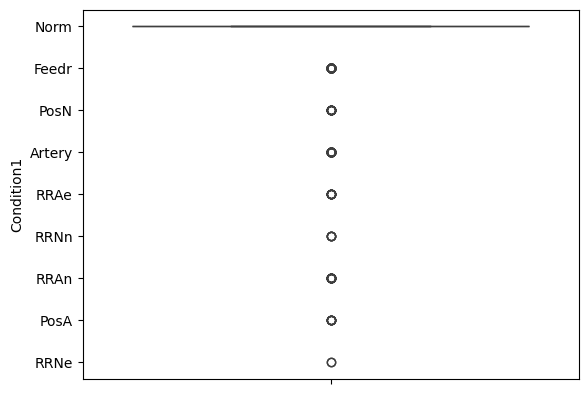

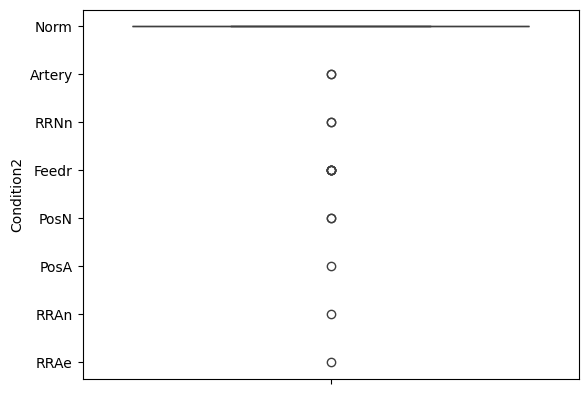

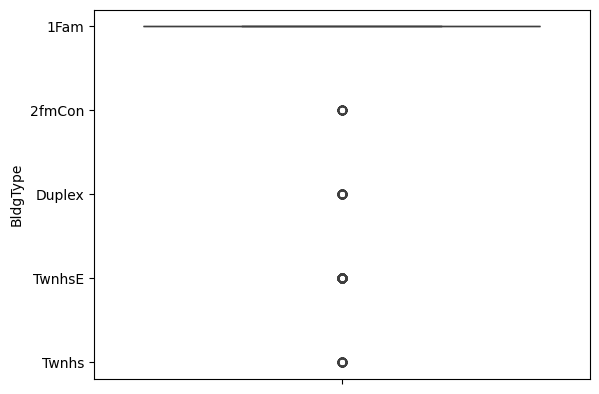

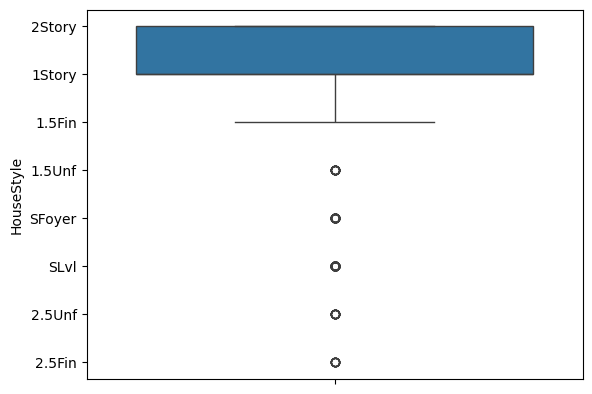

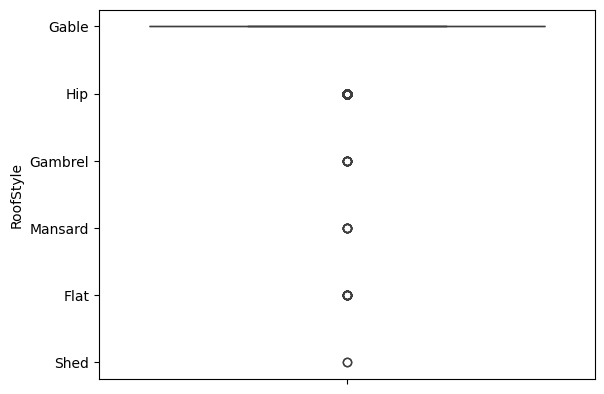

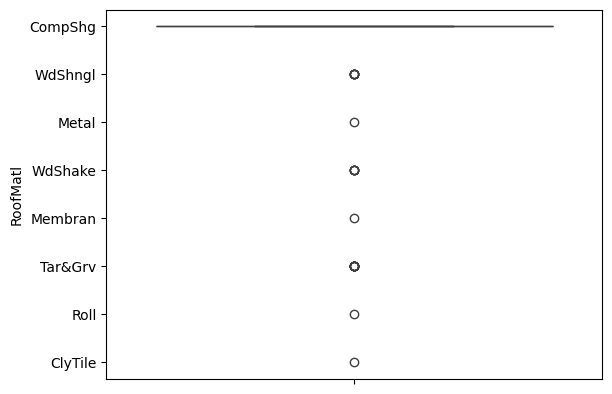

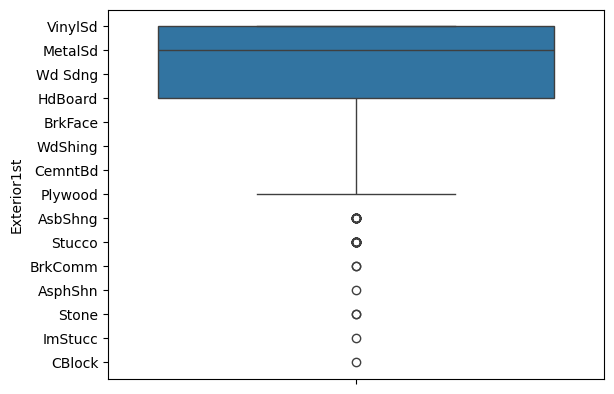

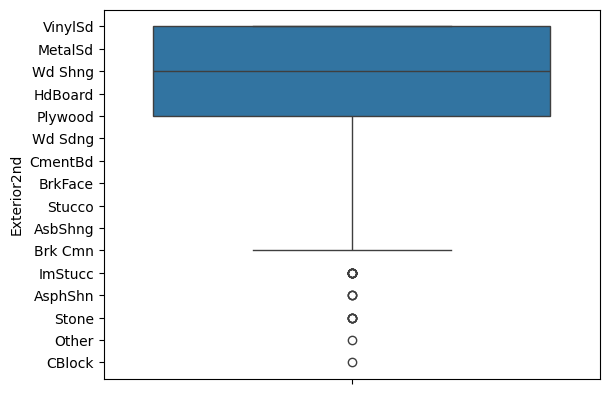

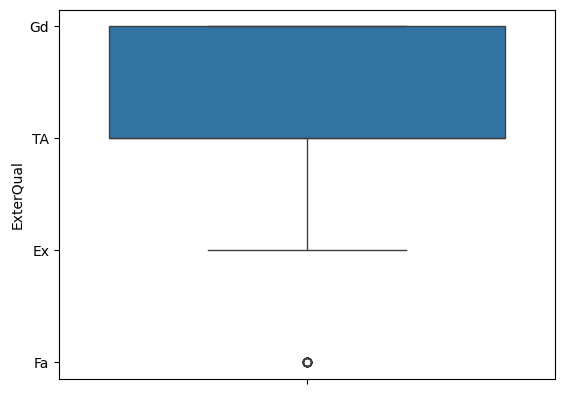

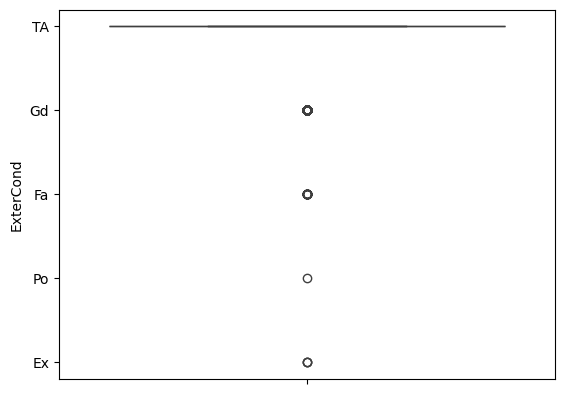

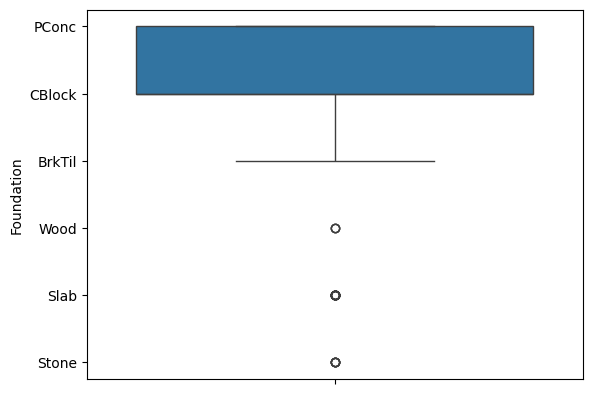

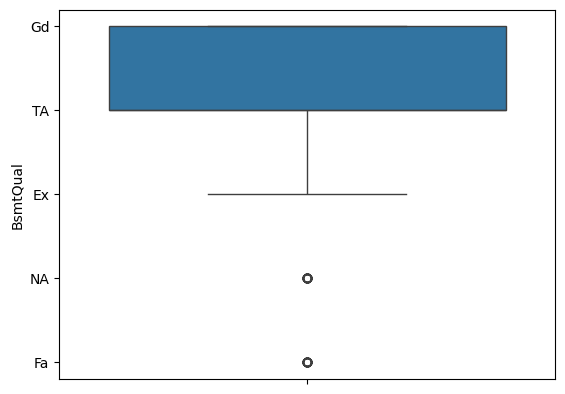

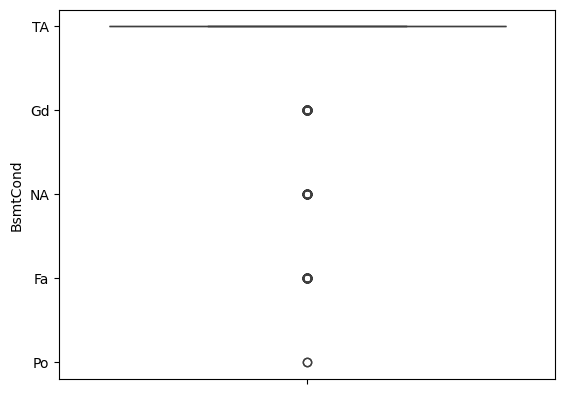

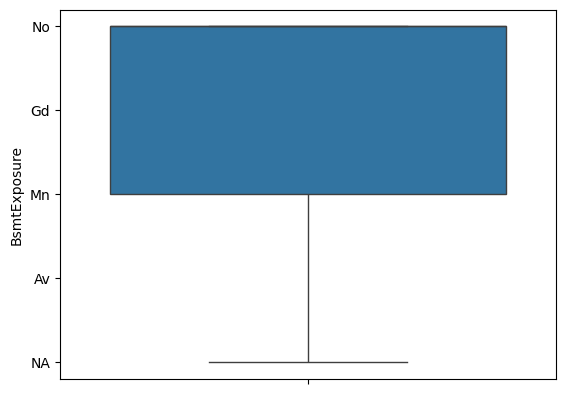

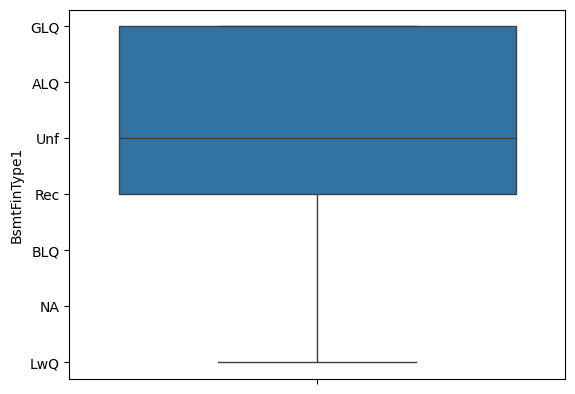

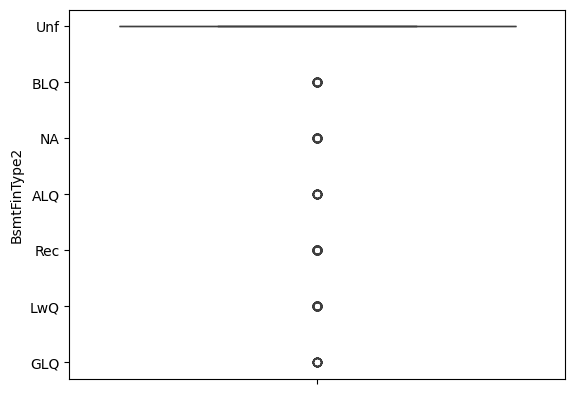

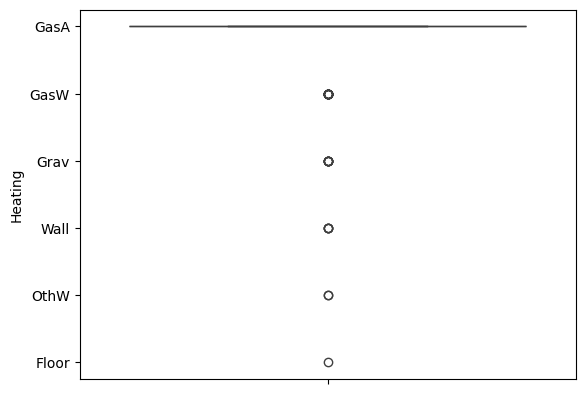

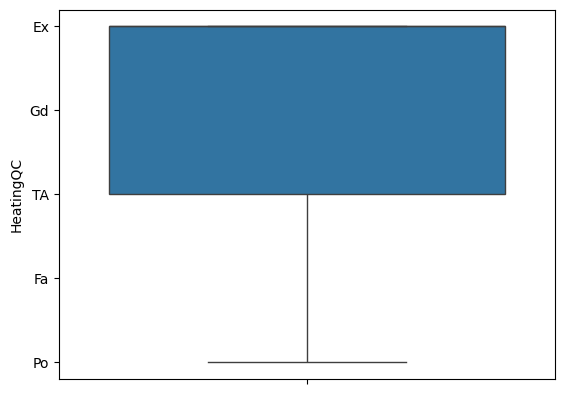

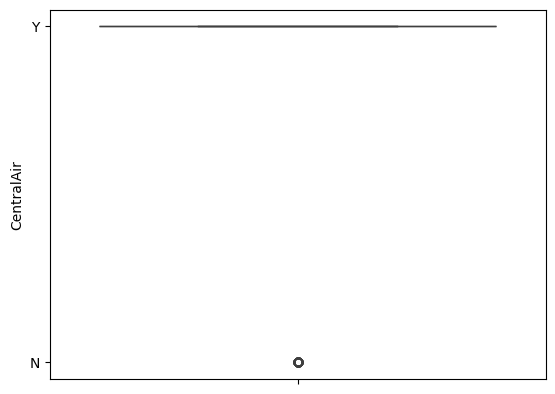

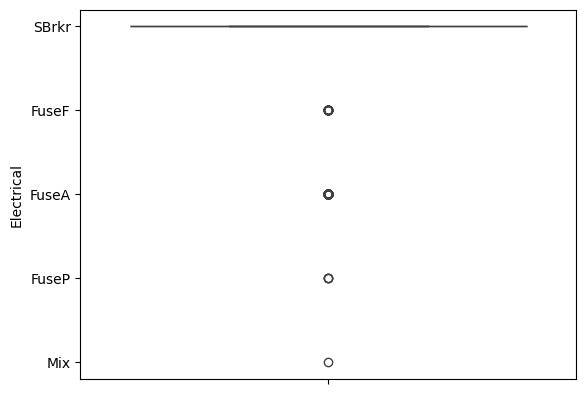

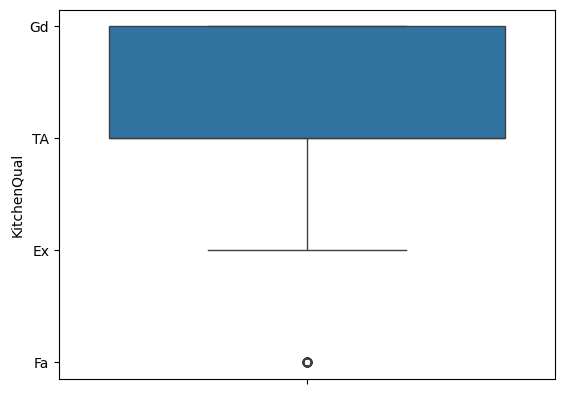

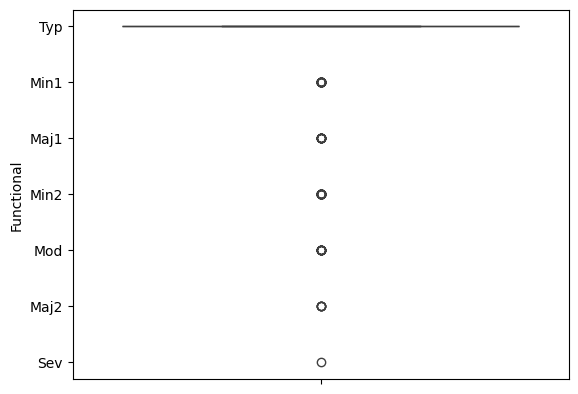

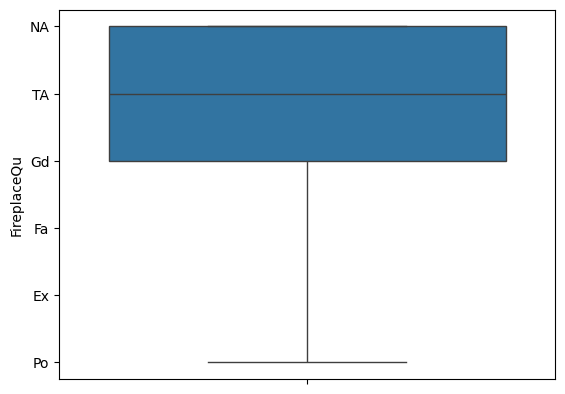

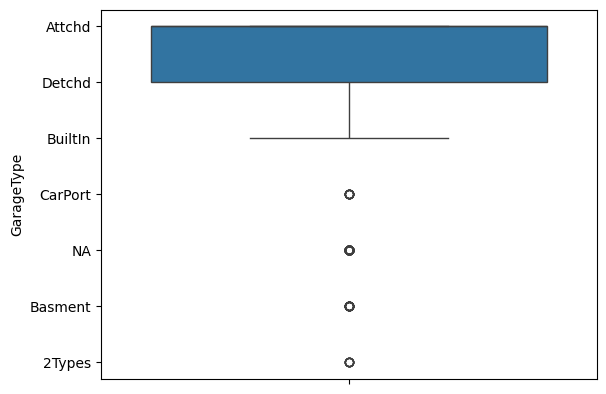

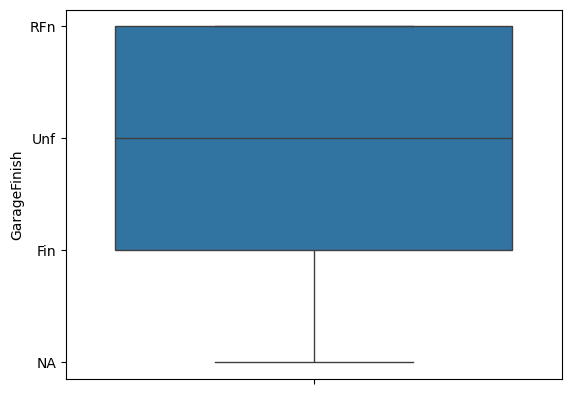

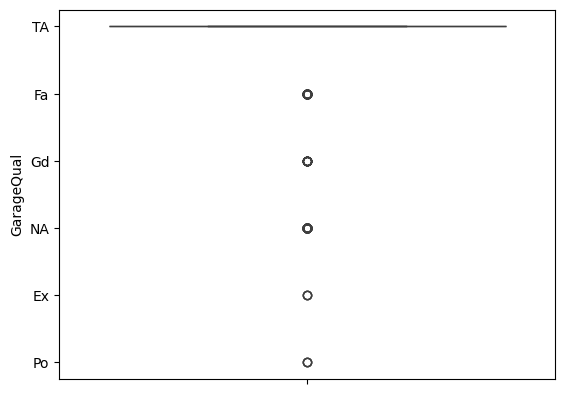

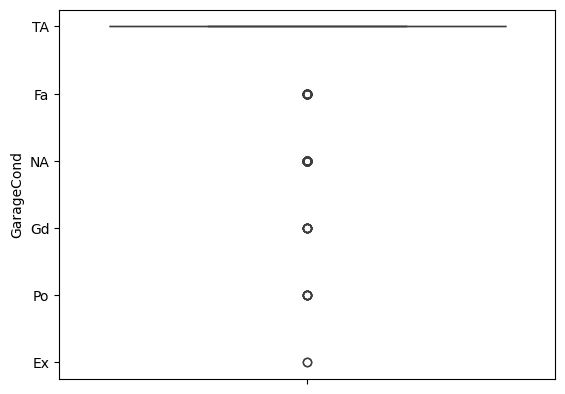

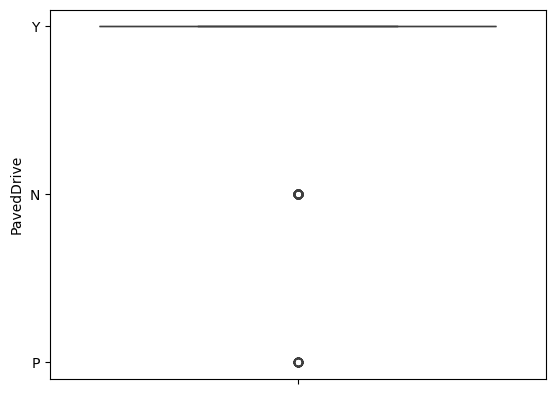

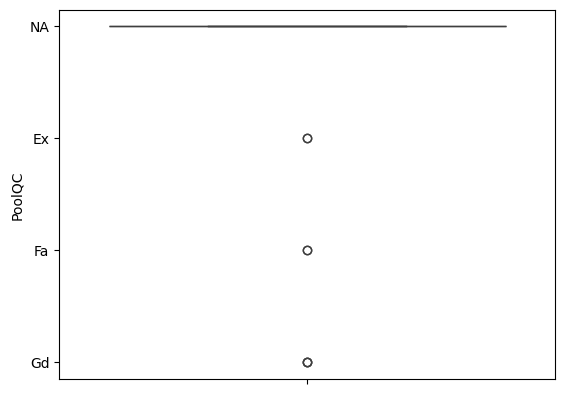

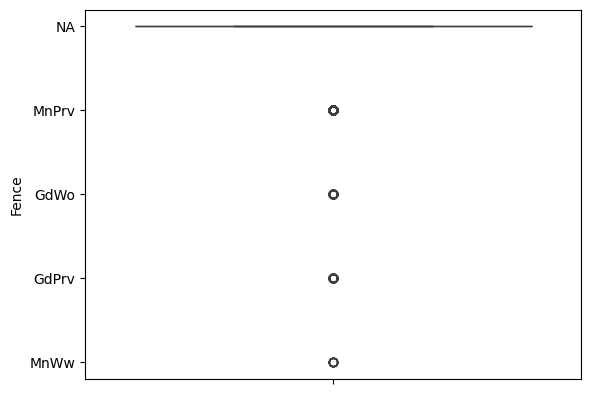

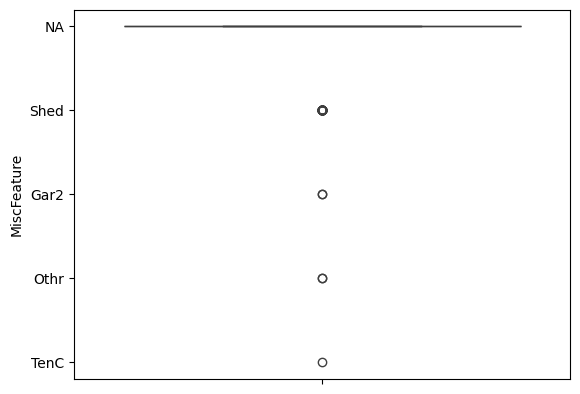

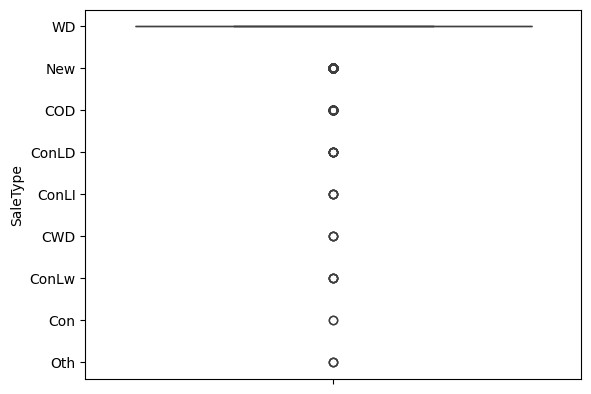

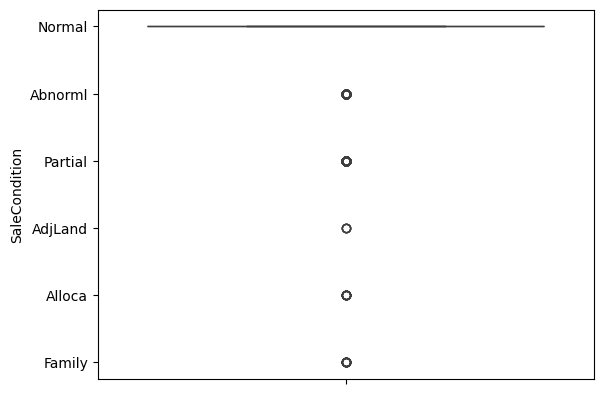

In [29]:
for col in data.select_dtypes(include=['object']).columns:
    sns.boxplot(data[col])
    plt.show()

In [30]:
# Though box plots show outliers, but still not able to clearly understand
# Getting the percentage of outliers for numerical columns
# oputliers detections
outliers_percentage={}

for col in data.select_dtypes(exclude=['object']).columns:
    IQR=data[col].quantile(.75)-data[col].quantile(.25)
    outliers_count=data[(numeric_data[col]>(data[col].quantile(.75)+1.5*IQR)) | (data[col]<(data[col].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[col]=round(outliers_count/data.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
25,EnclosedPorch,14.25
9,BsmtFinSF2,11.44
4,OverallCond,8.56
27,ScreenPorch,7.95
0,MSSubClass,7.05
7,MasVnrArea,6.71
1,LotFrontage,6.37
16,BsmtHalfBath,5.62
24,OpenPorchSF,5.27
2,LotArea,4.73


In [31]:
# Capping otliers as below
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers (recommended for regression)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply to key numeric features
for col in data.select_dtypes(exclude=['object']).columns:
    numeric_data = treat_outliers_iqr(data, col)

In [32]:
#Checking outlier percentages again

In [33]:
for col in data.select_dtypes(exclude=['object']).columns:
    IQR=data[col].quantile(.75)-data[col].quantile(.25)
    outliers_count=data[(numeric_data[col]>(data[col].quantile(.75)+1.5*IQR)) | (data[col]<(data[col].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[col]=round(outliers_count/data.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
0,MSSubClass,0.0
1,LotFrontage,0.0
2,LotArea,0.0
3,OverallQual,0.0
4,OverallCond,0.0
5,YearBuilt,0.0
6,YearRemodAdd,0.0
7,MasVnrArea,0.0
8,BsmtFinSF1,0.0
9,BsmtFinSF2,0.0


## 5. EDA

### SalePrice

<Axes: xlabel='SalePrice', ylabel='Density'>

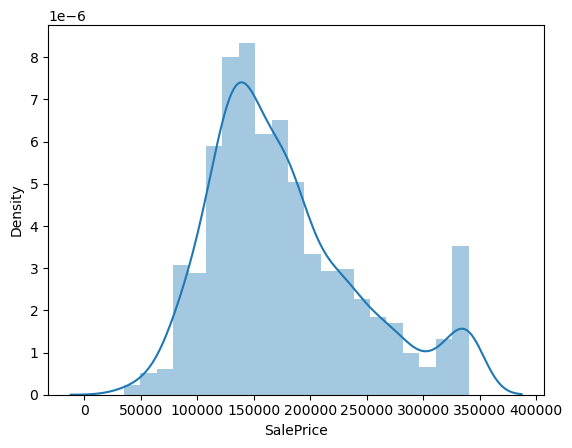

In [34]:
sns.distplot(data['SalePrice'])

### Numerical Columns

NameError: name 'target_col' is not defined

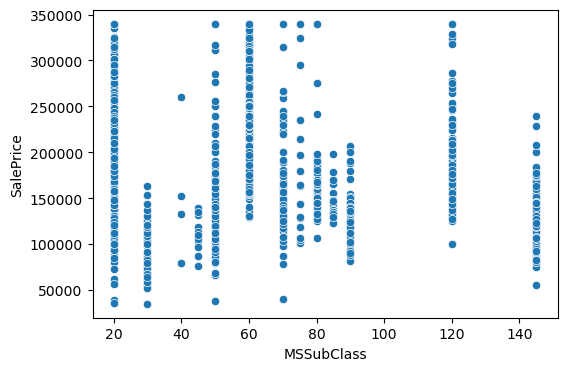

In [35]:
# Scatter plots for numeric columns
for col in data.select_dtypes(exclude = ['object']).columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=col, y='SalePrice')
    plt.title(f"{target_col} vs {col}")
    plt.tight_layout()
    plt.show()

### Categorical Columns

In [ ]:
for col in data.select_dtypes(include = ['object']).columns:
    sns.barplot(x=data[col], y=data['SalePrice'])
    plt.show()

## 5. Data Preparation 

In [ ]:
data.shape

In [ ]:
# split into X and y
y_data = data.pop('SalePrice')
X_data = data

In [ ]:
print(y_data.shape)
print(X_data.shape)

In [ ]:
data_categorical = X_data.select_dtypes(include=['object'])
data_categorical.head()

In [ ]:
# convert into dummies
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

In [ ]:
# drop categorical variables 
X_data = X_data.drop(list(data_categorical.columns), axis=1)

In [ ]:
# concat dummy variables 
X_data = pd.concat([X_data, data_dummies], axis=1)

In [ ]:
print(X_data.shape)

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [ ]:
X_train.describe()

In [ ]:
# scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled =  pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [ ]:
X_test_scaled =  pd.DataFrame(data=scaler.transform(X_test), columns=X_train.columns, index=X_test.index)

In [ ]:
X_train_scaled.describe()

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
corr_matrix = X_train.corr().abs()
corr_matrix

In [ ]:
# Get upper triangle (avoid self-correlation)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Stack pairs exceeding threshold
high_corr_pairs = upper.stack().reset_index()
high_corr_pairs.columns = ['var1', 'var2', 'corr_coef']
high_corr_pairs = high_corr_pairs[high_corr_pairs['corr_coef'] > 0.8]

print(f"Found {len(high_corr_pairs)} highly correlated pairs (|r| > 0.8)")
print(high_corr_pairs.head(50))

## 6. Model Building and Evaluation

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

### Feature Selection using Linear Regression with RFE and StatsModel

In [ ]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_scaled, y_train)

rfe = RFE(estimator=lm, n_features_to_select=100)             # running RFE
rfe = rfe.fit(X_train_scaled, y_train)

In [ ]:
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
col = X_train_scaled.columns[rfe.support_]
col

In [ ]:
X_train_scaled.columns[~rfe.support_]

In [ ]:
X_train_rfe = X_train_scaled[col]
X_test_rfe = X_test_scaled[col]

##### Building model using statsmodel, for the detailed statistics

In [ ]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
X_test_rfe = sm.add_constant(X_test_rfe)

In [ ]:
y_train2 = y_train.reset_index(drop=True)
X_train_rfe2 = X_train_rfe.reset_index(drop=True)
lm = sm.OLS(y_train2,X_train_rfe2).fit()   # Running the linear model

In [ ]:
X_test_rfe2 = X_test_rfe.reset_index(drop=True)
y_test2 = y_test.reset_index(drop=True)

In [ ]:
print(lm.summary())

In [ ]:
# Removing columns with P value > 0.05
col_tobe_removed = ['1stFlrSF','2ndFlrSF','LotShape_IR3','Utilities_NoSeWa','LotConfig_FR3','Neighborhood_MeadowV','Neighborhood_NPkVill',
                    'Condition1_RRNn','Condition2_Feedr','Condition2_RRAe','HouseStyle_2.5Fin','RoofStyle_Shed','RoofMatl_CompShg','RoofMatl_CompShg',
                    'RoofMatl_Metal','RoofMatl_Roll','RoofMatl_Tar&Grv','RoofMatl_WdShngl','Exterior1st_BrkComm','Exterior1st_CemntBd',
                    'Exterior1st_MetalSd','Exterior2nd_MetalSd','Foundation_Wood','Functional_Maj2','GarageType_Basment','GarageType_CarPort',
                   'GarageType_Detchd','GarageType_NA','GarageQual_NA','GarageQual_Po','GarageQual_TA','GarageCond_Gd','PoolQC_Fa','MiscFeature_Othr',
                    'SaleType_CWD','SaleType_Con','SaleType_ConLD','SaleCondition_Alloca']
X_train_rfe2.drop(columns=col_tobe_removed, inplace=True, axis = True)
X_test_rfe2.drop(columns=col_tobe_removed, inplace=True, axis = True)

In [ ]:
lm = sm.OLS(y_train2,X_train_rfe2).fit()
print(lm.summary())

In [ ]:
# Removing columns with P value > 0.05
col_tobe_removed = ['Neighborhood_Timber','RoofStyle_Mansard','Heating_Wall','GarageType_Attchd','GarageType_BuiltIn','PoolQC_NA']
X_train_rfe2.drop(columns=col_tobe_removed, inplace=True, axis = True)
X_test_rfe2.drop(columns=col_tobe_removed, inplace=True, axis = True)

In [ ]:
lm = sm.OLS(y_train2,X_train_rfe2).fit()
print(lm.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Removing columns with P value > 0.05
col_tobe_removed = ['SaleCondition_AdjLand','MSZoning_RL']
X_train_rfe2.drop(columns=col_tobe_removed, inplace=True, axis = True)
X_test_rfe2.drop(columns=col_tobe_removed, inplace=True, axis = True)

In [ ]:
lm = sm.OLS(y_train2,X_train_rfe2).fit()
print(lm.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
col_tobe_removed = ['MSZoning_FV','MSZoning_RH','MSZoning_RM','Neighborhood_IDOTRR']
X_train_rfe2.drop(columns=col_tobe_removed, inplace=True, axis = True)
X_test_rfe2.drop(columns=col_tobe_removed, inplace=True, axis = True)

In [ ]:
lm = sm.OLS(y_train2,X_train_rfe2).fit()
print(lm.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_rfe2.drop(columns='KitchenQual_TA', inplace=True, axis = True)
X_test_rfe2.drop(columns='KitchenQual_TA', inplace=True, axis = True)

In [ ]:
lm = sm.OLS(y_train2,X_train_rfe2).fit()
print(lm.summary())

In [ ]:
col_tobe_removed = ['KitchenQual_Fa','KitchenQual_Gd']
X_train_rfe2.drop(columns=col_tobe_removed, inplace=True, axis = True)
X_test_rfe2.drop(columns=col_tobe_removed, inplace=True, axis = True)

In [ ]:
lm = sm.OLS(y_train2,X_train_rfe2).fit()
print(lm.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_rfe2.drop(columns='BsmtQual_TA', inplace=True, axis = True)
X_test_rfe2.drop(columns='BsmtQual_TA', inplace=True, axis = True)

In [ ]:
lm = sm.OLS(y_train2,X_train_rfe2).fit()
print(lm.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
col_tobe_removed = ['LotConfig_FR2','BsmtQual_Fa','BsmtExposure_NA','GarageQual_Fa']
X_train_rfe2.drop(columns=col_tobe_removed, inplace=True, axis = True)
X_test_rfe2.drop(columns=col_tobe_removed, inplace=True, axis = True)

In [ ]:
lm = sm.OLS(y_train2,X_train_rfe2).fit()
print(lm.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_rfe2.drop(columns='Exterior1st_Wd Sdng', inplace=True, axis = True)
X_test_rfe2.drop(columns='Exterior1st_Wd Sdng', inplace=True, axis = True)

In [ ]:
lm = sm.OLS(y_train2,X_train_rfe2).fit()
print(lm.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_rfe2.drop(columns='Exterior2nd_Wd Sdng', inplace=True, axis = True)
X_test_rfe2.drop(columns='Exterior2nd_Wd Sdng', inplace=True, axis = True)

In [ ]:
lm = sm.OLS(y_train2,X_train_rfe2).fit()
print(lm.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Predictions on the basis of the model
y_train_pred = lm.predict(X_train_rfe2)

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Linear Regression with selected features

In [ ]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_rfe2, y_train)

In [ ]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
X_train_rfe2.columns

In [ ]:
X_test_rfe2.columns

In [ ]:
y_pred_train = lm.predict(X_train_rfe2)
y_pred_test = lm.predict(X_test_rfe2)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

In [ ]:
# We see that train r2 is 0.9338633898725257 and test r2 is 0.787400573175377
# This means that the mode is overfitting

### Ridge Regression with selected features

In [ ]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

In [ ]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

In [ ]:
#Fitting Ridge model for alpha = 0.4 
alpha = 0.4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe2, y_train)
print(ridge.coef_)

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe2)
y_pred_test = ridge.predict(X_test_rfe2)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

In [ ]:
# Top features
RidgeF = pd.DataFrame(index=X_train_rfe2.columns)
RidgeF.rows = X_train_rfe2.columns
RidgeF['Lasso Regression ($\lambda$ = 0.4)'] = ridge.coef_
RidgeF.sort_values(by='Lasso Regression ($\lambda$ = 0.4)', ascending=False).head(5)

In [ ]:
RidgeF.sort_values(by='Lasso Regression ($\lambda$ = 0.4)', ascending=True).head(5)

In [ ]:
# Top 5 Features

# GrLivArea
# PoolQC_Gd
# Condition2_PosN
# OverallQual
# YearBuilt

### Lasso with selected features

In [ ]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe2, y_train) 

In [ ]:
## Printing the best hyperparameter alpha
print(model_cv.best_params_)

In [ ]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =10

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe2, y_train) 

In [ ]:
lasso.coef_

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe2)
y_pred_test = lasso.predict(X_test_rfe2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

In [ ]:
# Top features
LassoF = pd.DataFrame(index=X_train_rfe2.columns)
LassoF.rows = X_train_rfe2.columns
LassoF['Lasso Regression ($\lambda$ = 10)'] = lasso.coef_
LassoF.sort_values(by='Lasso Regression ($\lambda$ = 10)', ascending=False).head(5)

In [ ]:
LassoF.sort_values(by='Lasso Regression ($\lambda$ = 10)', ascending=True).head(5)

In [ ]:
# Top 5 Features

# PoolQC_Gd
# Condition2_PosN
# GrLivArea
# OverallQual
# YearBuilt

### Model Comparison

In [ ]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression ($\lambda$ = 0.4)')
ls_metric = pd.Series(metric3, name = 'Lasso Regression ($\lambda$ = 10)')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

### Changes in the coefficients after regularization

In [ ]:
betas = pd.DataFrame(index=X_train_rfe2.columns)

In [ ]:
betas.rows = X_train_rfe2.columns

In [ ]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [ ]:
pd.set_option('display.max_rows', None)
betas.head(80)

## 7.Assignment Questions

### Ridge model with double lambda

In [ ]:
#Fitting Ridge model for alpha = 0.4 and printing coefficients which have been penalised
alpha = 0.8
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train_rfe2, y_train)
print(ridge2.coef_)

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train_rfe2)
y_pred_test = ridge2.predict(X_test_rfe2)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

In [ ]:
# Top 5 features
betas2 = pd.DataFrame(index=X_train_rfe2.columns)
betas2.rows = X_train_rfe2.columns
betas2['Ridge Regression ($\lambda$ = 0.8)'] = ridge2.coef_
betas2.sort_values(by='Ridge Regression ($\lambda$ = 0.8)', ascending=False).head(5)

In [ ]:
betas2.sort_values(by='Ridge Regression ($\lambda$ = 0.8)', ascending=True).head(5)

In [ ]:
# Top 5 Features

# GrLivArea
# PoolQC_Gd
# Condition2_PosN
# OverallQual
# YearBuilt

### Lasso model with double lambda

In [ ]:
#Fitting Lasso model for alpha = 20 and printing coefficients which have been penalised

alpha =20

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train_rfe2, y_train) 

In [ ]:
lasso2.coef_

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso2.predict(X_train_rfe2)
y_pred_test = lasso2.predict(X_test_rfe2)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

In [ ]:
# Top features
betas3 = pd.DataFrame(index=X_train_rfe2.columns)
betas3.rows = X_train_rfe2.columns
betas3['Lasso Regression ($\lambda$ = 20)'] = lasso2.coef_
betas3.sort_values(by='Lasso Regression ($\lambda$ = 20)', ascending=False).head(5)

In [ ]:
betas3.sort_values(by='Lasso Regression ($\lambda$ = 20)', ascending=True).head(5)

In [ ]:
# Top 5 Features

# PoolQC_Gd
# Condition2_PosN
# GrLivArea
# OverallQual
# YearBuilt

### Comparison of Models

In [ ]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric2 = pd.Series(metric4, name = 'Ridge Regression ($\lambda$ = 0.8)')
lg_metric2 = pd.Series(metric5, name = 'Lasso Regression ($\lambda$ = 20)')

final_metric = pd.concat([final_metric, rg_metric2, lg_metric2], axis = 1)

final_metric

### Ridge Model without top 5 features

In [ ]:
# Top 5 Features

# GrLivArea
# PoolQC_Gd
# Condition2_PosN
# OverallQual
# YearBuilt
col_tobe_removed = ['GrLivArea','PoolQC_Gd','Condition2_PosN','OverallQual','YearBuilt']
X_train_new = X_train_rfe2.drop(col_tobe_removed , axis = 1)
X_test_new = X_test_rfe2.drop(col_tobe_removed , axis = 1)

In [ ]:
alpha = 0.8
ridge3 = Ridge(alpha=alpha)

ridge3.fit(X_train_new, y_train)

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge3.predict(X_train_new)
y_pred_test = ridge3.predict(X_test_new)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

In [ ]:
# Top features
RidgeWTF = pd.DataFrame(index=X_train_new.columns)
RidgeWTF.rows = X_train_new.columns
RidgeWTF['Ridge Regression ($\lambda$ = 0.4) | without top features'] = ridge3.coef_
RidgeWTF.sort_values(by='Ridge Regression ($\lambda$ = 0.4) | without top features', ascending=False).head(5)

In [ ]:
RidgeWTF.sort_values(by='Ridge Regression ($\lambda$ = 0.4) | without top features', ascending=True).head(5)

In [ ]:
# Top Features

# GarageArea
# Condition2_PosA
# Neighborhood_StoneBr
# BsmtFinSF1
# YearRemodAdd

### Lasso Model without top 5 features

In [ ]:
alpha =10
lasso3 = Lasso(alpha=alpha)
lasso3.fit(X_train_new, y_train) 

In [ ]:
y_pred_train = lasso3.predict(X_train_new)
y_pred_test = lasso3.predict(X_test_new)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

In [ ]:
# Top features
LassoWTF = pd.DataFrame(index=X_train_new.columns)
LassoWTF.rows = X_train_new.columns
LassoWTF['Lasso Regression ($\lambda$ = 10) | without top features'] = lasso3.coef_
LassoWTF.sort_values(by='Lasso Regression ($\lambda$ = 10) | without top features', ascending=False).head(5)

In [ ]:
LassoWTF.sort_values(by='Lasso Regression ($\lambda$ = 10) | without top features', ascending=True).head(5)

In [ ]:
# Top Features

# Condition2_PosA
# GarageArea
# Neighborhood_StoneBr
# BsmtFinSF1
# YearRemodAdd